In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from copy import copy

In [17]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["font.size"] = "10"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rc('lines', lw=2.0)
mpl.rc('axes', lw=1.0)
mpl.rc('xtick.major', size=4, width=1.0)
mpl.rc('ytick.major', size=4, width=1.0)
mpl.rc('xtick.minor', size=2, width=0.8)
mpl.rc('ytick.minor', size=2, width=0.8)
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10 
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10

In [18]:
import sys
import os
sys.path.append("../../")

In [19]:
from axion_kSZ_source.auxiliary.helper_functions import is_array
from axion_kSZ_source.theory.cosmology import Cosmology, CosmologyCustomH
from axion_kSZ_source.auxiliary.cosmo_db import CosmoDB
from axion_kSZ_source.auxiliary.integration_helper import IntegrationHelper
from axion_kSZ_source.axion_camb_wrappers.run_axion_camb import AxionCAMBWrapper
from axion_kSZ_source.auxiliary.survey_helper import StageII,StageIII,StageIV,SurveyType
from axion_kSZ_source.fisher_analysis.compute_mpv import compute_mean_pairwise_velocity

In [20]:
r_vals = np.arange(20.0, 180.0, 2.0)
out_folder = "./fisher_outputs/sharpK_final_StageIV/"
prefix_derivs = "sharpK_5point_FFTLog_approx_test_derivs"
prefix_fisher = "sharpK_5point_FFTLog_approx_test_fisher_matrices"
axion_abundances = np.array([1.0e-04, 1.6e-04, 2.5e-04, 4.0e-04, 6.3e-04, 1.0e-03, 1.6e-03, 2.5e-03, 4.0e-03, 6.3e-03, 1.0e-02, 1.6e-02, 2.5e-02, 4.0e-02, 5.3e-02, 6.3e-02, 1.0e-01, 1.1e-01, 1.6e-01, 2.1e-01, 2.5e-01, 2.6e-01, 3.2e-01, 3.7e-01, 4.0e-01, 4.2e-01, 4.7e-01, 5.3e-01, 5.8e-01, 6.3e-01, 6.8e-01, 7.4e-01, 7.9e-01, 8.4e-01, 8.9e-01, 9.5e-01])
fractional_step_sizes = np.array([0.05, 0.1, 0.2, 0.4])
axion_masses=[1e-27, 1e-26, 1e-25]
deriv_labels = [r"$h$", r"$\omega_{\rm{DM}}$", r"$\omega_b$", r"$n_s$", "$A_s$", r"$\eta_{\rm{axion}}$"]
axion_plot_abundances=[1e-4, 0.01, 0.1, 0.68, 0.95]

In [21]:
cosmo_database="./CAMB_outputs/cosmo_db_final.dat"
cosmoDB = CosmoDB(cosmo_database)
intHelper = IntegrationHelper(1024)


In [23]:
derivs = []
cosmos = []
camb_wrappers = []
for i, ma in enumerate(axion_masses):
    cosmo = CosmologyCustomH.generate(axion_frac=0.4, m_axion=ma)
    exist,ID, ran_TF, successful_TF, out_path, log_path = cosmoDB.add(cosmo)
    file_root = os.path.basename(out_path)
    root_path = out_path[:-len(file_root)]
    wrapper = AxionCAMBWrapper(root_path, file_root, log_path)
    wrapper(cosmo)
    cosmo.set_H_interpolation(wrapper.get_hubble)
    cosmos.append(cosmo)
    camb_wrappers.append(wrapper)
    
#     derivs.append(np.load(out_folder+prefix_derivs+f"_ma={ma:.3E}.npy"))
# fid_values = [cosmos[0].h, cosmos[0].omegaDM, cosmos[0].omegaB, cosmos[0].n_s, cosmos[0].A_s, 0.4]

In [ ]:
print(cosmoDB)

In [24]:
velocities = []
delta_r = 2.0
rMin=1.0e-2
r_vals = np.arange(20.0, 180.0, delta_r)
survey = StageIV(Cosmology())
window="sharp_k"
kMin,kMax=1.0e-4,1.0e2
for i, ma in enumerate(axion_masses):
    velocities.append(compute_mean_pairwise_velocity(r_vals, rMin, cosmos[i], camb_wrappers[i], survey, window=window, old_bias=False, jenkins_mass=False, integrationHelper=intHelper, kMin=kMin, kMax=kMax, do_unbiased=True, get_correlation_functions=False, use_approximations=True, use_FFTLog=True))

/Users/dgrin/opt/miniconda3/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
../../axion_kSZ_source/theory/halo_bias_base.py:31: RuntimeWarning: The given value of k_max=1.00E+02 is not feasible because you chose a sharp-k filter and a maximum mass of m_min=4.04E+13. k_max has instead be set to 5.02E-01
  warnings.warn(f"The given value of k_max={kMax:.2E} is not feasible because you chose a sharp-k filter and a maximum mass of m_min={mMin:.2E}. k_max has instead be set to {1 / self.radius_of_mass(mMin):.2E}", RuntimeWarning)
/Users/dgrin/opt/miniconda3/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to Fals

IndexError: list index out of range

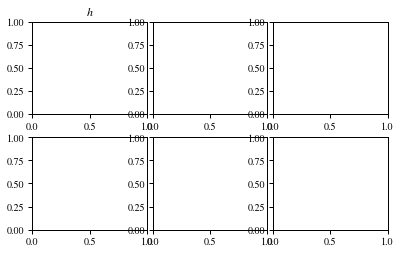

In [25]:
fig=plt.figure(figsize=(7.05,3.5))

gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fig, height_ratios=[1,1], hspace=0.25, wspace=0.05, left=0.2, top=0.95)

axs=[]
for j in range(2):
    for i in range(3):
        if j==0:
            axs.append(fig.add_subplot(gs[j,i], sharey=axs[0] if i>=1 else None))
        else:
            axs.append(fig.add_subplot(gs[j,i], sharex=axs[i]))
for i_d, label in enumerate(deriv_labels):
    axs[i_d].set_title(deriv_labels[i_d])
    for i_m, ma in enumerate(axion_masses):
        p=axs[i_d].plot(r_vals, derivs[i_m][0,i_d,0,:]*fid_values[i_d]/velocities[i_m][0][0])
        #axs[i_d].plot(r_vals, derivs[i_m][0,i_d,3,:]*fid_values[i_d]/velocities[i_m][0][3], linestyle="dashed", color=p[0].get_color())
        
    if i_d%3!=0:
        [label.set_visible(False) for label in axs[i_d].get_yticklabels()]
    if i_d<3:
        [label.set_visible(False) for label in axs[i_d].get_xticklabels()]
axs[0].set_ylabel(r"$d\ln V/d\ln\theta$")
axs[3].set_ylabel(r"$d\ln V/d\ln\theta$")
for i in range(3,6):
    axs[i].set_xlabel(r"$r$ [$h^{-1} \rm{Mpc}$]")
#ax1.set_ylabel(r"$\frac{d\ln V}{d\ln \theta}$")
#ax1.legend(ncol=2)